In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\Subrat\\Downloads\\knight assignment\\train.csv")
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [3]:
df.shape

(82657, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [5]:
df.drop_duplicates(keep='last',inplace=True)

In [6]:
df.shape

(77641, 12)

In [7]:
df.drop('user_name',axis=1,inplace=True)

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 0][:10]

,Total,Missing Percent
region_2,43827,56.448268
designation,22183,28.571245
region_1,11961,15.405520
price,5285,6.806971
province,33,0.042503
country,33,0.042503


In [9]:
df.drop('region_2',axis=1,inplace=True)

In [10]:
df.dropna(how='any',subset=['province','country'],inplace=True)

In [11]:
df.shape

(77608, 10)

In [12]:
df.reset_index(drop=True,inplace=True)
df.head()

,country,review_title,review_description,designation,points,price,province,region_1,winery,variety
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,Andrew Peace,Chardonnay
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),North by Northwest,Red Blend
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,Renato Ratti,Nebbiolo
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,Château du Cèdre,Malbec


In [13]:
df['price'] = df.groupby(['country'])['price'].transform(lambda x: x.fillna(x.mode()[0]))

In [14]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 0][:10]

,Total,Missing Percent
designation,22179,28.578239
region_1,11928,15.369550


In [15]:
import re
import datetime

In [16]:

def find_wine_age(data,col):
  MFG = []
  for i in range(len(data[col])):
    temp = re.findall(r'\b(\d{4})\b',data[col][i])
    designation = data['designation'][i]
    if pd.isnull(designation):
      temp = [j for j in temp if j not in ['']]
    else:
      temp = [j for j in temp if j not in designation]
    year = ''.join([i for i in temp if not i=='' and int(i)>1950 and int(i)<2021])
    MFG.append(year)
  data['MFG'] = pd.Series(MFG)
  data['wine_age'] = data.MFG.apply(lambda x: datetime.date.today().year - int(x) if not x == '' else 0)
  data.drop('MFG',axis=1,inplace=True)
  return data

In [17]:
df = find_wine_age(df,col='review_title')

In [18]:
df.head()

,country,review_title,review_description,designation,points,price,province,region_1,winery,variety,wine_age
0,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,Andrew Peace,Chardonnay,13
1,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),North by Northwest,Red Blend,6
2,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,Renato Ratti,Nebbiolo,13
3,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,Domaine l'Ancienne Cure,Bordeaux-style White Blend,10
4,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,Château du Cèdre,Malbec,8


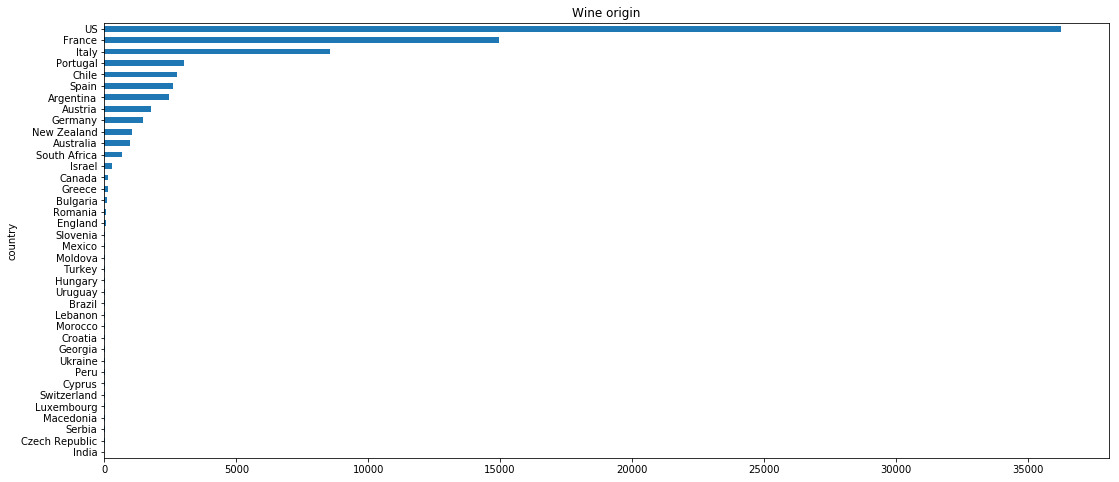

In [19]:
wine_origin = df.groupby(['country']).size()

wine_origin = pd.DataFrame(wine_origin,columns=['count'])
wine_origin.reset_index(inplace=True)
wine_origin.sort_values(by=['count'],inplace=True)

wine_origin.plot.barh(x='country', y='count',figsize=(18,8),title='Wine origin',legend=False);

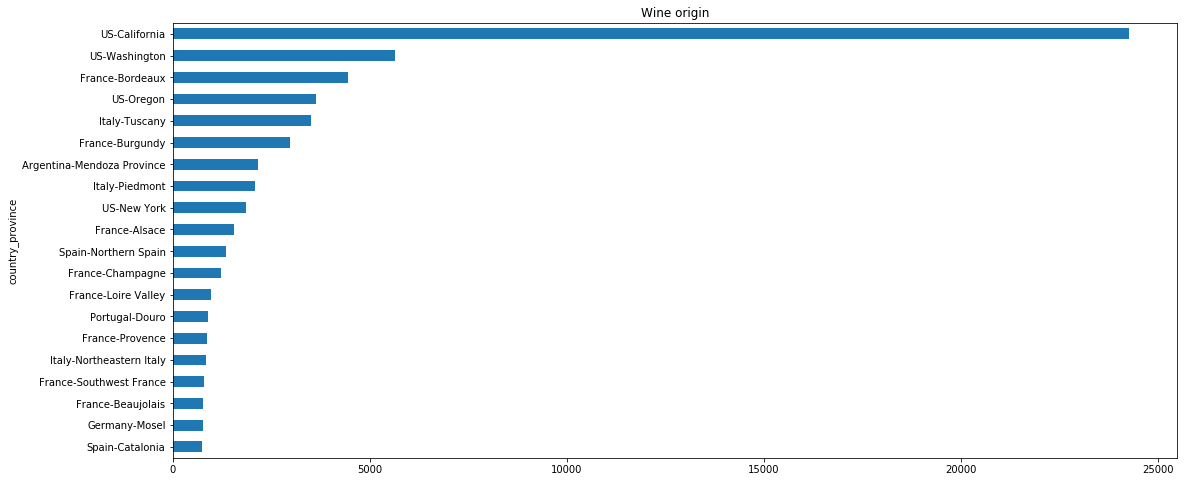

In [20]:
country_province=df.groupby(['country', 'province']).size().sort_values(ascending=True) .reset_index(name='count').drop_duplicates(subset='province')

country_province['country_province']=country_province['country']+'-'+country_province['province']
country_province=country_province.tail(20)

country_province.plot.barh(x='country_province', y='count',figsize=(18,8),title='Wine origin',legend=False);

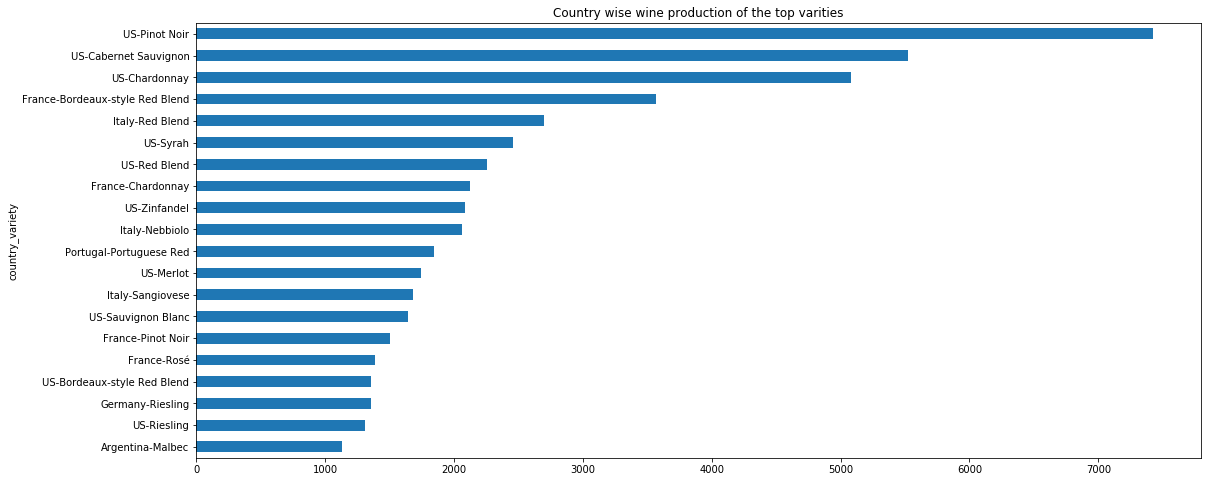

In [21]:
country_variety=df.groupby(['country', 'variety']).size().sort_values(ascending=True) .reset_index(name='count')

country_variety['country_variety']=country_variety['country']+'-'+country_variety['variety']
country_variety=country_variety.tail(20)
country_variety.plot.barh(x='country_variety', y='count',figsize=(18,8),title='Country wise wine production of the top varities',legend=False)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df[['review_description']]
y = df['variety']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.20)

In [25]:
import re
from string import punctuation
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [26]:
p = re.compile(r'[\s{}0-9]+'.format(re.escape(punctuation)))

In [27]:
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

In [28]:
def cleantexts(dff,punctuation_patterns,col):
    dff[col] = dff[col].apply(lambda x: ' '.join([word.lower() for word in nltk.word_tokenize(x)]))
    dff[col] = dff[col].apply(lambda x:' '.join([ i for i in nltk.word_tokenize(x) if i not in stop_words and len(i)>1])) #and not i.isnumeric() and not i.isalpha()
    dff[col] = dff[col].apply(lambda x: re.sub(punctuation_patterns,' ',x))
    return dff

In [29]:
X_train = cleantexts(dff=X_train,punctuation_patterns=p,col='review_description')

C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [30]:
X_train.head(3)

,review_description
26588,ripe loamy cherry blackberry aromas moderately...
35710,hearty rich pinot noir famed hirsch vineyard s...
74269,s nice see historic winery finally represente...


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_rvdesc = TfidfVectorizer(sublinear_tf =True,min_df=2,max_df=0.9,max_features = 2000)
x = vectorizer_rvdesc.fit_transform(X_train['review_description'])
feature_desc = pd.DataFrame(x.toarray())
columns = [vectorizer_rvdesc.get_feature_names()]
feature_desc.columns = columns
feature_desc.sample(3)

,abound,absolutely,abundance,abundant,acacia,accent,accented,accents,accessible,accompanied,...,youthful,youthfully,zealand,zest,zestiness,zesty,zin,zinfandel,zingy,zippy
47487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()

In [34]:
y_label_train = label_encoder.fit_transform(y_train)

In [35]:
y_label_train

array([24, 14,  5, ..., 27,  3,  0])

In [36]:
y_label_train.shape

(62086,)

In [45]:
import xgboost as xgb

In [46]:
dtrain = xgb.DMatrix(data=feature_desc, label=y_label_train)

In [47]:
params = {
    'max_depth': 6,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 28,
    'n_gpus': 0
}

In [48]:
bst = xgb.train(params, dtrain)

In [50]:
X_test = cleantexts(dff=X_test,punctuation_patterns=p,col='review_description')

C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [51]:
X_test.head()

,review_description
2478,vanilla honey citrus spice aromas lead lusciou...
23848,already velvet texture broadening give wine sh...
76729,rose leather black cherry balsamic aromas lead...
38132,opens aromas forest floor truffle ripe berry l...
14563,sugary simple candied cherry blackberry flavor...


In [54]:
X_test = vectorizer_rvdesc.transform(X_test['review_description'])
feature_desc_test = pd.DataFrame(X_test.toarray())
columns_test = [vectorizer_rvdesc.get_feature_names()]
feature_desc_test.columns = columns_test
feature_desc_test.sample(3)

,abound,absolutely,abundance,abundant,acacia,accent,accented,accents,accessible,accompanied,...,youthful,youthfully,zealand,zest,zestiness,zesty,zin,zinfandel,zingy,zippy
1879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192942,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
y_label_test = label_encoder.transform(y_test)

In [58]:
y_label_test

array([26,  0, 21, ...,  9, 27,  3])

In [59]:
dtest = xgb.DMatrix(data=feature_desc_test)

In [60]:
pred = bst.predict(dtest)

In [61]:
pred

array([26.,  0., 11., ..., 20.,  3.,  0.], dtype=float32)

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_label_test, pred))

              precision    recall  f1-score   support

           0       0.55      0.69      0.61      1041
           1       0.51      0.25      0.33       161
           2       0.82      0.31      0.45       205
           3       0.56      0.65      0.60      1431
           4       0.84      0.45      0.58       215
           5       0.53      0.90      0.67      1767
           6       0.62      0.38      0.47       152
           7       0.65      0.41      0.50       158
           8       0.75      0.55      0.64       195
           9       0.59      0.42      0.49       397
          10       0.70      0.36      0.47       467
          11       0.72      0.70      0.71       423
          12       0.76      0.35      0.48       164
          13       0.72      0.39      0.50       212
          14       0.60      0.78      0.68      1993
          15       0.51      0.40      0.45       369
          16       0.48      0.29      0.36       167
          17       0.62    

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_label_test, pred)

0.6078469269424043

In [66]:
df1=pd.read_csv("C:\\Users\\Subrat\\Downloads\\knight assignment\\test.csv")
df1.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [77]:
df1.shape

(20665, 11)

In [67]:
X_new = df1[['review_description']]

In [68]:
X_testn = cleantexts(dff=X_new,punctuation_patterns=p,col='review_description')

C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Subrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [70]:
X_testn.head()

,review_description
0,nicely differentiated companion stewart bottli...
1,charred smoky herbal aromas blackberry trend d...
2,slightly sour funky earth restrained white age...
3,concentrated midnight black malbec delivers ar...
4,earthy aromas suggesting grilled porcini leath...


In [80]:
x_testn = vectorizer_rvdesc.transform(X_testn['review_description'])
feature_desc_testn = pd.DataFrame(x_testn.toarray())
columns_test = [vectorizer_rvdesc.get_feature_names()]
feature_desc_testn.columns = columns_test
feature_desc_testn.sample(3)

,abound,absolutely,abundance,abundant,acacia,accent,accented,accents,accessible,accompanied,...,youthful,youthfully,zealand,zest,zestiness,zesty,zin,zinfandel,zingy,zippy
3874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
dtestn= xgb.DMatrix(data=feature_desc_testn)

In [82]:
pred1 = bst.predict(dtestn)

In [97]:
pred1

[14,
 9,
 5,
 9,
 21,
 5,
 0,
 3,
 17,
 23,
 14,
 4,
 20,
 14,
 17,
 19,
 27,
 14,
 3,
 0,
 14,
 14,
 25,
 0,
 5,
 20,
 3,
 5,
 22,
 17,
 19,
 3,
 24,
 3,
 0,
 5,
 14,
 5,
 3,
 5,
 3,
 3,
 18,
 25,
 8,
 3,
 3,
 5,
 0,
 14,
 14,
 5,
 19,
 14,
 22,
 23,
 15,
 26,
 22,
 5,
 23,
 22,
 10,
 2,
 5,
 3,
 8,
 5,
 14,
 14,
 14,
 19,
 23,
 11,
 5,
 14,
 5,
 21,
 3,
 5,
 14,
 3,
 22,
 17,
 5,
 0,
 22,
 14,
 14,
 17,
 14,
 19,
 20,
 24,
 3,
 17,
 18,
 23,
 3,
 14,
 0,
 14,
 0,
 22,
 21,
 17,
 15,
 14,
 7,
 17,
 3,
 25,
 5,
 20,
 19,
 5,
 14,
 5,
 5,
 4,
 3,
 11,
 16,
 5,
 5,
 5,
 13,
 25,
 0,
 14,
 0,
 14,
 9,
 14,
 5,
 9,
 5,
 20,
 5,
 14,
 0,
 24,
 14,
 3,
 24,
 5,
 6,
 14,
 27,
 0,
 22,
 23,
 14,
 17,
 11,
 5,
 5,
 20,
 8,
 24,
 3,
 17,
 17,
 14,
 3,
 5,
 6,
 16,
 15,
 5,
 5,
 11,
 14,
 19,
 22,
 23,
 17,
 20,
 11,
 17,
 19,
 8,
 13,
 14,
 17,
 26,
 1,
 14,
 17,
 0,
 5,
 5,
 14,
 24,
 24,
 3,
 14,
 23,
 11,
 14,
 14,
 5,
 14,
 3,
 3,
 25,
 14,
 5,
 18,
 5,
 5,
 22,
 3,
 14,
 7,
 14,
 14,
 14,
 

In [84]:
pred1.shape

(20665,)

In [87]:
pred1 = [int(i) for i in pred1.tolist()]

In [98]:
variety=label_encoder.inverse_transform(pred1)

In [99]:
variety

array(['Pinot Noir', 'Malbec', 'Chardonnay', ..., 'Red Blend', 'Malbec',
       'Cabernet Sauvignon'], dtype=object)

In [101]:
dataset = pd.DataFrame({'variety':variety})
dataset.shape

(20665, 1)

In [105]:
result= pd.concat([df1,dataset],axis=1)
result.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Malbec
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Malbec
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese


In [107]:
result.to_csv(r'C:\\Users\\Subrat\\Downloads\\knight assignment\\resultfintech.csv', index=False)